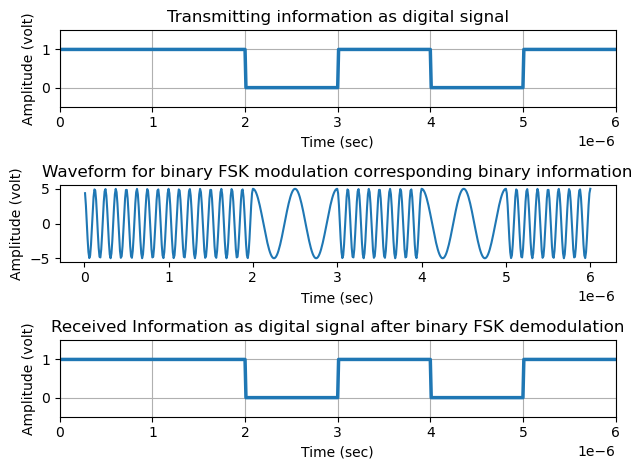

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Binary information
x = [1, 1, 0, 1, 0, 1]
bp = 0.000001

# Representation of Transmitting binary information as digital signal
bit = []
for n in range(len(x)):
    if x[n] == 1:
        se = np.ones(100)
    elif x[n] == 0:
        se = np.zeros(100)
    bit = np.concatenate((bit, se))

t1 = np.arange(bp / 100, bp * len(x) + bp / 100, bp / 100)
plt.subplot(3, 1, 1)
plt.plot(t1, bit, linewidth=2.5)
plt.grid(True)
plt.axis([0, bp * len(x), -0.5, 1.5])
plt.ylabel('Amplitude (volt)')
plt.xlabel('Time (sec)')
plt.title('Transmitting information as digital signal')

# Binary FSK Modulation
A = 5
br = 1 / bp
f1 = br * 8
f2 = br * 2
t2 = np.arange(bp / 99, bp + bp / 99, bp / 99)
ss = len(t2)
m = []

for i in range(len(x)):
    if x[i] == 1:
        y = A * np.cos(2 * np.pi * f1 * t2)
    elif x[i] == 0:
        y = A * np.cos(2 * np.pi * f2 * t2)
    m = np.concatenate((m, y))

t3 = np.arange(bp / 99, bp * len(x) + bp / 99, bp / 99)
plt.subplot(3, 1, 2)
plt.plot(t3, m)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (volt)')
plt.title('Waveform for binary FSK modulation corresponding binary information')

# Binary FSK Demodulation
mn = []
for n in range(ss, len(m) + 1, ss):
    t = np.arange(bp / 99, bp + bp / 99, bp / 99)
    y1 = np.cos(2 * np.pi * f1 * t)
    y2 = np.cos(2 * np.pi * f2 * t)
    mm = y1 * m[n - ss:n]
    mmm = y2 * m[n - ss:n]
    z1 = np.trapz(mm, t)
    z2 = np.trapz(mmm, t)
    zz1 = round(2 * z1 / bp)
    zz2 = round(2 * z2 / bp)
    if zz1 > A / 2:
        a = 1
    elif zz2 > A / 2:
        a = 0
    mn.append(a)

# Representation of Binary Information as digital signal
bit = []
for n in range(len(mn)):
    if mn[n] == 1:
        se = np.ones(100)
    elif mn[n] == 0:
        se = np.zeros(100)
    bit = np.concatenate((bit, se))

t4 = np.arange(bp / 100, bp * len(mn) + bp / 100, bp / 100)
plt.subplot(3, 1, 3)
plt.plot(t4, bit, linewidth=2.5)
plt.grid(True)
plt.axis([0, bp * len(mn), -0.5, 1.5])
plt.ylabel('Amplitude (volt)')
plt.xlabel('Time (sec)')
plt.title('Received Information as digital signal after binary FSK demodulation')

plt.tight_layout()
plt.show()
